In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from l15_msevi import msevi as msv
import MSGtools as mst

import datetime as dt
import geooperations as go

from plotting_tools.colormaps import enhanced_colormap2
emap = enhanced_colormap2()

import seaborn as sns

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
t= dt.datetime(2010,5,24,13,30)

In [4]:
s = msv.MSevi(t,'eu','rss',['IR_108'])

Region suggests use of hdf file
ERROR:  /vols/altair/datasets/eumcst//msevi_rss/l15_hdf/eu/2010/05/24/msg?-sevi-20100524t1330z-l15hdf-rss-eu.c2.h5  does not exist!
... reading  /tmp/hrit6446671463/H-000-MSG1__-MSG1_RSS____-IR_108___-000007___-201005241330-__
... reading  /tmp/hrit6446671463/H-000-MSG1__-MSG1_RSS____-IR_108___-000008___-201005241330-__

Combine segments

Do calibration


In [5]:
s.rad2bt()

In [6]:
ir108 = s.bt['IR_108']

In [7]:
ctth = mst.get_nwcsaf_prod("CTTH_HEIGHT",t,calibrate=True)

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [8]:
ctth

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., 9600., 9600., 9600.],
       [   0.,    0.,    0., ..., 9600., 9200., 8800.],
       [   0.,    0.,    0., ..., 9000., 8800., 8400.]], dtype=float32)

In [10]:
slon,slat = mst.get_msg_lon_lat('eu')

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [11]:
ir108_korr = go.parallax_correct_msg(ir108,slon,slat,ctth,'std','eu','rss',2)

Text(0.5, 1.0, 'IR 10,8 µm parallaxenkorrigiert - IR 10,8 µm, 24.05.2010 13:30 UTC')

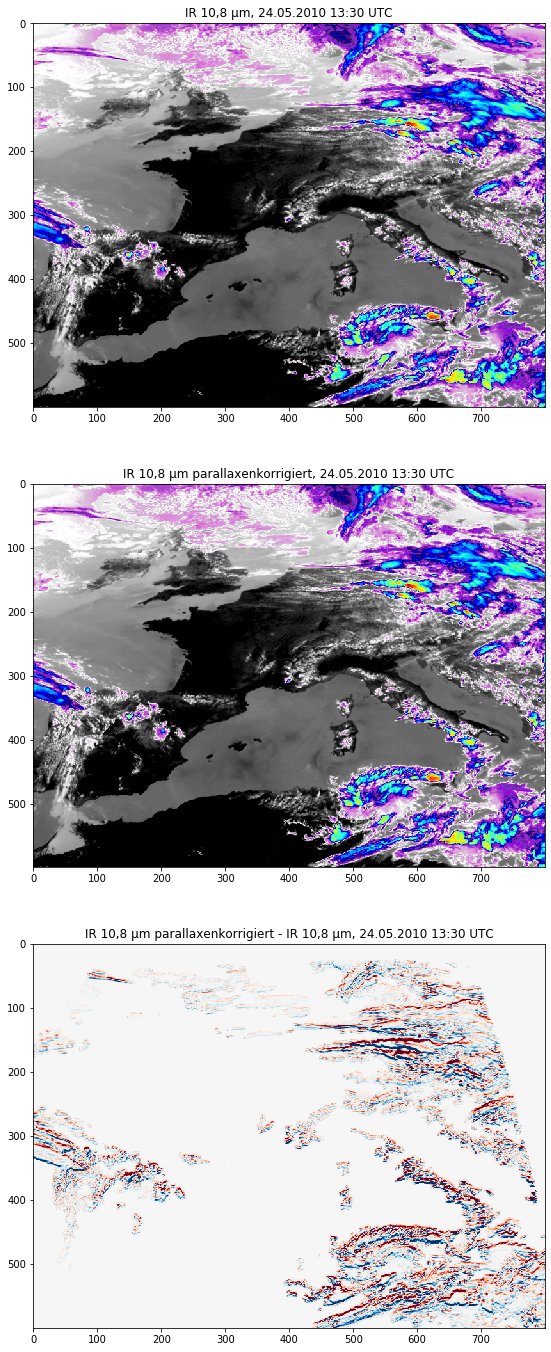

In [22]:
fig,ax = plt.subplots(3,1,figsize=(16,24))
ax[0].imshow(ir108,vmin=210,vmax=300,cmap=emap)
ax[0].set_title("IR 10,8 µm, 24.05.2010 13:30 UTC")
ax[1].imshow(ir108_korr,vmin=210,vmax=300,cmap=emap)
ax[1].set_title("IR 10,8 µm parallaxenkorrigiert, 24.05.2010 13:30 UTC")
ax[2].imshow(ir108_korr-ir108,vmin=-20,vmax=20,cmap='RdBu_r')
ax[2].set_title("IR 10,8 µm parallaxenkorrigiert - IR 10,8 µm, 24.05.2010 13:30 UTC")

In [36]:
import pandas as pd
from io_tools import radolan
from plotting_tools.colormaps import radar_cmap as rc
import fixed_colourbar as fc
import tqdm

from plotting_tools.bmaps import radolan_rx_map

In [39]:
r = radolan.Radolan()

TypeError: __init__() got an unexpected keyword argument 'linecolour'

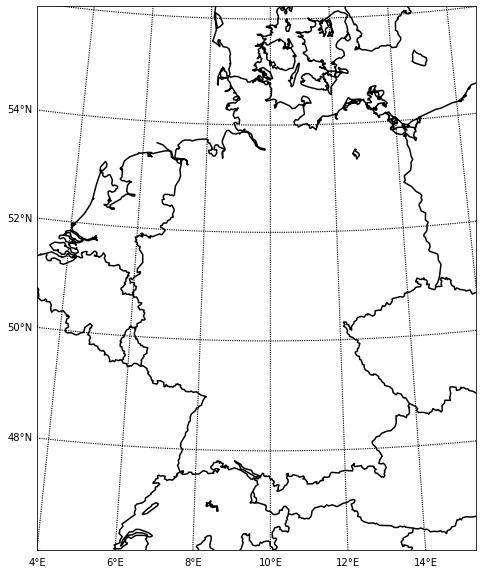

In [48]:
rfig,rax,rmap = radolan_rx_map(linecolour='black')

In [49]:
x,y = rmap(r.lon,r.lat)

In [27]:
times = pd.date_range(start="20100524T0000",end="20100524T2355",freq="5min")

In [56]:
sns.set_context("talk")

In [58]:
for t in tqdm.tqdm(times):
    t = t.to_pydatetime()
    
    r.read(t)
    
    fig,ax,m = radolan_rx_map(rmap,linecolour='black',figsize=(18,18))
    plt.sca(ax)
    p = ax.pcolormesh(x,y,r.data,vmin=5,vmax=65,cmap=rc())
    plt.colorbar(p,label=r"Z / dBZ")
    ax.set_title("RADOLAN RX, {}".format(t.strftime("%d.%m.%Y %H:%M")))
    plt.savefig("/vols/satellite/home/lenk/pics/20100425/radar/radolan_rx_{}.png".format(t.strftime("%Y%m%dT%H%M")),bbox_inches="tight")
    plt.close()








  0%|          | 0/288 [00:00<?, ?it/s]






  0%|          | 1/288 [00:02<10:41,  2.24s/it]






  1%|          | 2/288 [00:04<10:39,  2.23s/it]






  1%|          | 3/288 [00:06<10:36,  2.23s/it]






  1%|▏         | 4/288 [00:08<10:34,  2.23s/it]






  2%|▏         | 5/288 [00:11<10:32,  2.23s/it]






  2%|▏         | 6/288 [00:13<10:29,  2.23s/it]






  2%|▏         | 7/288 [00:15<10:26,  2.23s/it]






  3%|▎         | 8/288 [00:17<10:25,  2.23s/it]






  3%|▎         | 9/288 [00:20<10:22,  2.23s/it]






  3%|▎         | 10/288 [00:24<12:45,  2.75s/it]






  4%|▍         | 11/288 [00:26<11:56,  2.59s/it]






  4%|▍         | 12/288 [00:28<11:13,  2.44s/it]






  5%|▍         | 13/288 [00:30<10:45,  2.35s/it]






  5%|▍         | 14/288 [00:32<10:31,  2.30s/it]






  5%|▌         | 15/288 [00:34<10:20,  2.27s/it]






  6%|▌         | 16/288 [00:36<10:03,  2.22s/it]






  6%|▌         | 17/288 [00:39<09:51,  2.18s/it]






  6%|▋         | 18/2

 37%|███▋      | 107/288 [03:50<06:23,  2.12s/it]






 38%|███▊      | 108/288 [03:52<06:21,  2.12s/it]






 38%|███▊      | 109/288 [03:54<06:19,  2.12s/it]






 38%|███▊      | 110/288 [03:56<06:17,  2.12s/it]






 39%|███▊      | 111/288 [03:59<06:36,  2.24s/it]






 39%|███▉      | 112/288 [04:01<06:27,  2.20s/it]






 39%|███▉      | 113/288 [04:03<06:21,  2.18s/it]






 40%|███▉      | 114/288 [04:05<06:15,  2.16s/it]






 40%|███▉      | 115/288 [04:07<06:11,  2.15s/it]






 40%|████      | 116/288 [04:10<06:16,  2.19s/it]






 41%|████      | 117/288 [04:12<06:12,  2.18s/it]






 41%|████      | 118/288 [04:14<06:07,  2.16s/it]






 41%|████▏     | 119/288 [04:16<06:03,  2.15s/it]






 42%|████▏     | 120/288 [04:18<05:59,  2.14s/it]






 42%|████▏     | 121/288 [04:20<05:56,  2.13s/it]






 42%|████▏     | 122/288 [04:22<05:54,  2.14s/it]






 43%|████▎     | 123/288 [04:24<05:51,  2.13s/it]






 43%|████▎     | 124/288 [04:27<05:48,  2.13s/it

 74%|███████▍  | 213/288 [07:36<02:38,  2.12s/it]






 74%|███████▍  | 214/288 [07:38<02:36,  2.11s/it]






 75%|███████▍  | 215/288 [07:40<02:33,  2.10s/it]






 75%|███████▌  | 216/288 [07:42<02:31,  2.10s/it]






 75%|███████▌  | 217/288 [07:44<02:28,  2.10s/it]






 76%|███████▌  | 218/288 [07:47<02:26,  2.09s/it]






 76%|███████▌  | 219/288 [07:49<02:24,  2.09s/it]






 76%|███████▋  | 220/288 [07:51<02:22,  2.09s/it]






 77%|███████▋  | 221/288 [07:53<02:20,  2.09s/it]






 77%|███████▋  | 222/288 [07:55<02:18,  2.10s/it]






 77%|███████▋  | 223/288 [07:57<02:16,  2.10s/it]






 78%|███████▊  | 224/288 [07:59<02:14,  2.10s/it]






 78%|███████▊  | 225/288 [08:01<02:11,  2.09s/it]






 78%|███████▊  | 226/288 [08:03<02:09,  2.09s/it]






 79%|███████▉  | 227/288 [08:05<02:07,  2.09s/it]






 79%|███████▉  | 228/288 [08:07<02:05,  2.09s/it]






 80%|███████▉  | 229/288 [08:10<02:03,  2.09s/it]






 80%|███████▉  | 230/288 [08:12<02:00,  2.08s/it